In [14]:
import sys
from temgymbasic.model import (
    Model,
)
from temgymbasic import components as comp
import matplotlib.pyplot as plt
from PySide6.QtWidgets import QApplication
from temgymbasic.gui import TemGymWindow

import numpy as np
from temgymbasic.utils import calculate_phi_0
from temgymbasic import gbd

from typing import Tuple, NamedTuple
from temgymbasic.plotting import plot_model
%matplotlib ipympl

In [15]:
n_rays = 1
wavelength = 0.001
k = 2 * np.pi / wavelength

wavelengths = np.full(n_rays, wavelength)

a = 3
b = 5

size = 64
det_shape = (size, size)
pixel_size = 0.2 / size
dsize = det_shape[0] * pixel_size

x_det = np.linspace(-dsize / 2, dsize / 2, size)

theta_x = 0
theta_y = 0

deg_yx = np.deg2rad((theta_y, theta_x ))
tilt_yx = np.tan(deg_yx)

wo = 0.01
wos = np.full(n_rays, wo)

div = wavelength / (np.pi * wo)

dPx = wo
dPy = wo
dHx = div
dHy = div

z_r = (np.pi * wo ** 2) / wavelengths

x0 = 0
y0 = 0

coeffs = [0.0, 0, 0.0, 0.0, 0]

In [16]:
components = (
    comp.GaussBeam(
        z=0.0,
        voltage=calculate_phi_0(wavelength),
        radius=x0,
        wo=wo,
        tilt_yx=tilt_yx
    ),
    comp.Lens(
        z= a - 2,
        f = 3,
        name='Condenser Lens 1',
    ),
    comp.Lens(
        z= a - 1.5,
        f = 3,
        name='Condenser Lens 2',
    ),
    comp.DoubleDeflector(
        first=comp.Deflector(z=a-1, name='Upper Deflector'),
        second=comp.Deflector(z=a-0.5, name='Lower Deflector'),
    ),
    comp.AberratedLens(
        z = a,
        f = 5,
        z1 = -a,
        z2 = a+3,
        coeffs=coeffs,
        name='Objective Lens'
    ),
    comp.Lens(
        z= a + 1,
        f = 5,
        name='Projector Lens 1',
    ),
    comp.Lens(
        z= a + 2,
        f = 5,
        name='Projector Lens 2',
    ),
    comp.AccumulatingDetector(
        z=a + 3,
        pixel_size=pixel_size,
        shape=det_shape,
        buffer_length=1,
        interference='gauss'
    ),
)


In [17]:
%%timeit

model = Model(components)
rays = tuple(model.run_iter(num_rays=2000, random = False))
image = model.detector.get_image(rays[-1])

/home/landers/TemGym/src/temgymbasic/aber.py:70: RuntimeWarning: invalid value encountered in divide
  dRhodx = np.where(mask, 0, X / np.sqrt(X**2 + Y**2))
/home/landers/TemGym/src/temgymbasic/aber.py:71: RuntimeWarning: invalid value encountered in divide
  dRhody = np.where(mask, 0, Y / np.sqrt(X**2 + Y**2))
/home/landers/TemGym/src/temgymbasic/aber.py:87: RuntimeWarning: invalid value encountered in divide
  dThetadx = np.where(mask, 0, -Y / (X ** 2 + Y ** 2))
/home/landers/TemGym/src/temgymbasic/aber.py:88: RuntimeWarning: divide by zero encountered in divide
  dThetady = np.where(mask, 0, 1 / (X ** 2 + Y ** 2))


112 ms ± 144 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


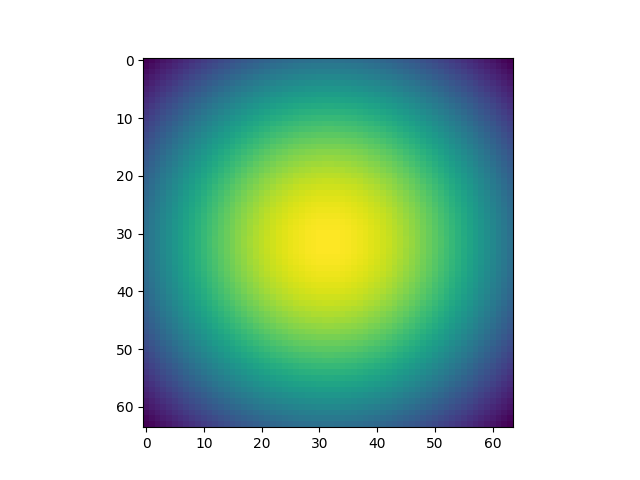

: 

In [18]:
plt.figure()
plt.imshow(np.abs(image))

In [ ]:
AppWindow = QApplication(sys.argv)
viewer = TemGymWindow(model)
viewer.show()
AppWindow.exec()


0

In [ ]:
# model = Model(components)
# rays = tuple(model.run_iter(num_rays=5000))
# image = model.detector.get_image(rays)
# det_x = np.linspace(-det_shape[1]//2*pixel_size, det_shape[1]//2*pixel_size, det_shape[1])

# plt.figure()
# plt.imshow(image)